# MNIST - Syft Duet - Data Owner 🎸

## PART 1: Launch a Duet Server and Connect

As a Data Owner, you want to allow someone else to perform data science on data that you own and likely want to protect.

In order to do this, we must load our data into a locally running server within this notebook. We call this server a "Duet".

To begin, you must launch Duet and help your Duet "partner" (a Data Scientist) connect to this server.

You do this by running the code below and sending the code snippet containing your unique Server ID to your partner and following the instructions it gives!

In [1]:
# TorchVision hotfix https://github.com/pytorch/vision/issues/3549
from syft.util import get_root_data_path
from torchvision import datasets
datasets.MNIST.resources = [
    (
        "https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz",
        "f68b3c2dcbeaaa9fbdd348bbdeb94873",
    ),
    (
        "https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz",
        "d53e105ee54ea40749a09fcbcd1e9432",
    ),
    (
        "https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz",
        "9fb629c4189551a2d022fa330f9573f3",
    ),
    (
        "https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz",
        "ec29112dd5afa0611ce80d1b7f02629c",
    ),
]
datasets.MNIST(get_root_data_path(), train=True, download=True)
datasets.MNIST(get_root_data_path(), train=False, download=True)

Dataset MNIST
    Number of datapoints: 10000
    Root location: /home/tudor/.syft/data
    Split: Test

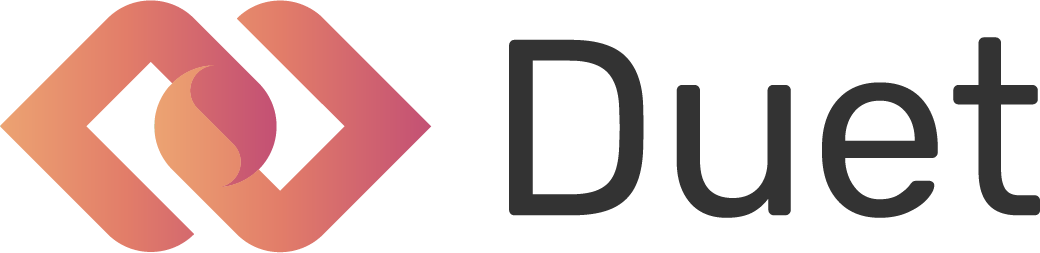

🎤  🎸  ♪♪♪ Starting Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-218-7-180.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 


[2021-05-31T10:19:44.296255+0300][CRITICAL][logger]][10220] Skipping torchvision.torchvision.transforms.functional.adjust_sharpness not supported in 0.8.2
[2021-05-31T10:19:44.296854+0300][CRITICAL][logger]][10220] Skipping torchvision.torchvision.transforms.functional.autocontrast not supported in 0.8.2
[2021-05-31T10:19:44.297753+0300][CRITICAL][logger]][10220] Skipping torchvision.torchvision.transforms.functional.equalize not supported in 0.8.2
[2021-05-31T10:19:44.298305+0300][CRITICAL][logger]][10220] Skipping torchvision.torchvision.transforms.functional.invert not supported in 0.8.2
[2021-05-31T10:19:44.298902+0300][CRITICAL][logger]][10220] Skipping torchvision.torchvision.transforms.functional.posterize not supported in 0.8.2
[2021-05-31T10:19:44.299650+0300][CRITICAL][logger]][10220] Skipping torchvision.torchvision.transforms.functional.solarize not supported in 0.8.2


♫♫♫ > DONE!

♫♫♫ > STEP 1: Send the following code to your Duet Partner!

import syft as sy
duet = sy.join_duet(loopback=True)



In [3]:
import syft as sy
duet = sy.launch_duet(loopback=True)

If you are in Jupyter Notebook (not Colab) the ☝🏾DUET LIVE STATUS above will animate 

## PART 2: Add Request Handlers

The MNIST Data Science Notebook makes a number of requests to access data. You can view these requests with:  
```
duet.requests.pandas
```
Then manually accept or deny them with:
```
duet.requests[0].accept()
```
However for training loops, this can be slow and tedious so the below code will create request handlers which will automatically respond with `accept` or `deny` depending on the name of the request.

In [2]:
duet.requests.pandas

♫♫♫ > Connecting...
ERROR! Session/line number was not unique in database. History logging moved to new session 4028


NameError: name 'duet' is not defined

[2021-05-31T10:19:55.128734+0300][CRITICAL][logger]][10220] Skipping torchvision.torchvision.transforms.functional.adjust_sharpness not supported in 0.8.2
[2021-05-31T10:19:55.129533+0300][CRITICAL][logger]][10220] Skipping torchvision.torchvision.transforms.functional.autocontrast not supported in 0.8.2
[2021-05-31T10:19:55.130152+0300][CRITICAL][logger]][10220] Skipping torchvision.torchvision.transforms.functional.equalize not supported in 0.8.2
[2021-05-31T10:19:55.130682+0300][CRITICAL][logger]][10220] Skipping torchvision.torchvision.transforms.functional.invert not supported in 0.8.2
[2021-05-31T10:19:55.131238+0300][CRITICAL][logger]][10220] Skipping torchvision.torchvision.transforms.functional.posterize not supported in 0.8.2
[2021-05-31T10:19:55.131969+0300][CRITICAL][logger]][10220] Skipping torchvision.torchvision.transforms.functional.solarize not supported in 0.8.2
[2021-05-31T10:19:55.290303+0300][CRITICAL][logger]][10220] Skipping torchvision.torchvision.transforms.fun


♫♫♫ > CONNECTED!



/home/tudor/anaconda3/envs/om_work/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [4]:
duet.requests.add_handler(
    action="accept"
)

/home/tudor/PySyft/packages/syft/src/syft/lib/torch/uppercase_tensor.py:30: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  grad = getattr(obj, "grad", None)


### <img src="https://github.com/OpenMined/design-assets/raw/master/logos/OM/mark-primary-light.png" alt="he-black-box" width="100"/> Checkpoint 1 : Well done!